In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [4]:
d_train = pd.read_csv('train.csv')
d_test = pd.read_csv('test.csv')

In [6]:
df= pd.concat([d_train,d_test], axis = 0)

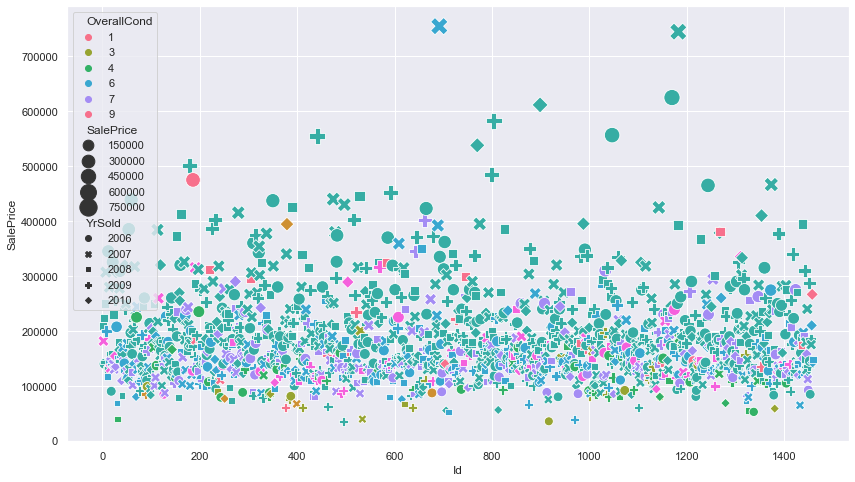

In [8]:
sns.set(rc={'figure.figsize':(14,8)})
sns.scatterplot(x=d_train.Id, y=d_train.SalePrice, size=d_train.SalePrice, hue=d_train.OverallCond, style=d_train.YrSold, 
                sizes=(80,300), palette=("husl"))
plt.show()

In [9]:
corr_limit = 0.5
data = d_train.corr()["SalePrice"].sort_values(ascending=False)

In [11]:
indices = data.index

[0.7909816005838053, 0.7086244776126515, 0.6404091972583519, 0.6234314389183622, 0.6135805515591943, 0.6058521846919153, 0.5606637627484453, 0.5337231555820284, 0.5228973328794967, 0.5071009671113866]


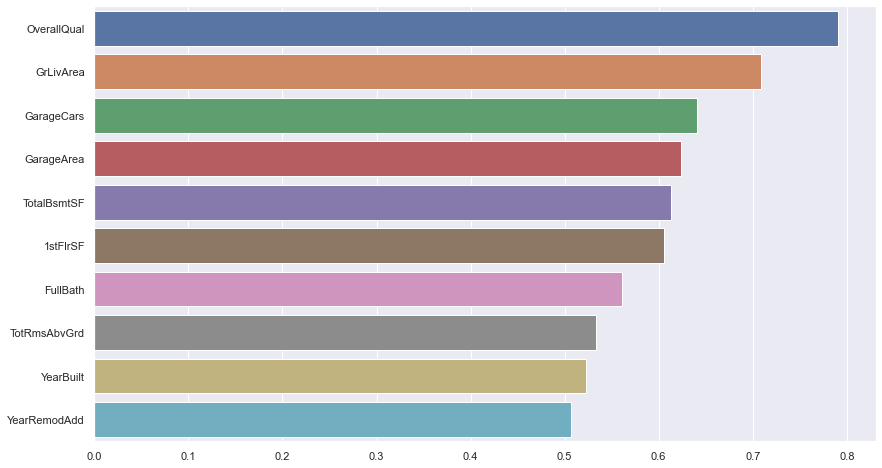

In [16]:
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>corr_limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
print(corr)

In [24]:
df.loc[:, df.isna().sum()>500].isna().sum()

Alley          2721
FireplaceQu    1420
PoolQC         2909
Fence          2348
MiscFeature    2814
SalePrice      1459
dtype: int64

In [26]:
df1 = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [30]:
df1.loc[:, df1.isna().sum()>50].isna().sum()

LotFrontage      486
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
dtype: int64

In [29]:
df1 = df1.drop(['SalePrice'], axis = 1)

In [31]:
def knn_imputing(df, na_column):
  df = df.copy()
  num_df= df.select_dtypes(np.number)
  non_na_columns = num_df.loc[:, num_df.isna().sum() == 0].columns

  y_train = num_df.loc[num_df[na_column].isna() == False, na_column]
  X_train = num_df.loc[num_df[na_column].isna() == False, non_na_columns]
  X_test = num_df.loc[num_df[na_column].isna() == True, non_na_columns]

  knn = KNeighborsRegressor()
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  df.loc[df[na_column].isna() == True, na_column] = y_pred

  return df



In [ ]:
df_1 = df1.loc[:,df1.isna().sum()>0].select_dtypes(np.number)